In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from sklearn.tree import plot_tree
df = pd.read_csv('/content/Loan Eligibility Prediction.csv')
df

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,480,Male,Yes,2,Graduate,No,2947,1603.0,10,360,1,Urban,N
610,525,Male,No,0,Graduate,No,4680,2087.0,15,360,1,Semiurban,N
611,551,Male,Yes,2,Graduate,Yes,6633,0.0,25,360,0,Rural,N
612,552,Male,Yes,1,Not Graduate,No,2492,2375.0,30,360,1,Rural,Y


In [2]:
df = pd.read_csv('/content/Loan Eligibility Prediction.csv')

In [3]:
#df.loc[[2,3,5]]
df.loc[[1,3,6]]
#df.iloc[2,4,7]  

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
6,271,Female,No,0,Graduate,No,3237,0.0,30,360,1,Urban,Y


In [4]:
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB


In [6]:
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
df.columns

Index(['Customer_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'],
      dtype='object')

In [8]:
df.shape

(614, 13)

In [9]:
print(df['Loan_Status'].value_counts())
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Property_Area'].value_counts())

Y    422
N    192
Name: Loan_Status, dtype: int64
Male      499
Female    115
Name: Gender, dtype: int64
Yes    399
No     215
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     523
Yes     91
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


In [10]:
df.groupby('Loan_Status').mean()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,
N,304.406250,0.864583,5446.078125,1877.807292,143.869792,339.562500,0.572917
Y,308.907583,0.853081,5384.068720,1504.516398,141.182464,338.587678,0.976303


In [11]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
df.replace({'Married':{'No':0,'Yes':1}},inplace=True)
df.replace({'Education':{'Graduate':0,'Not Graduate':1}},inplace=True)
df.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)
df.replace({'Property_Area':{'Rural':0,'Semiurban':1,'Urban':1}},inplace=True)
X = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',]]
X_std = X[['Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term']]
ss = StandardScaler()
X_std = ss.fit_transform(X_std)
X_std

array([[-0.49564665, -0.55448733, -1.52878429,  0.30300926],
       [-0.6724141 , -0.18306108, -1.4368431 , -3.14231829],
       [-0.29217568, -0.55448733, -1.34490192, -3.14231829],
       ...,
       [ 0.20142983, -0.55448733, -1.34490192,  0.30300926],
       [-0.47697057,  0.25779382, -1.28743867,  0.30300926],
       [-0.49204249,  0.74516252, -1.34490192, -2.2809864 ]])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

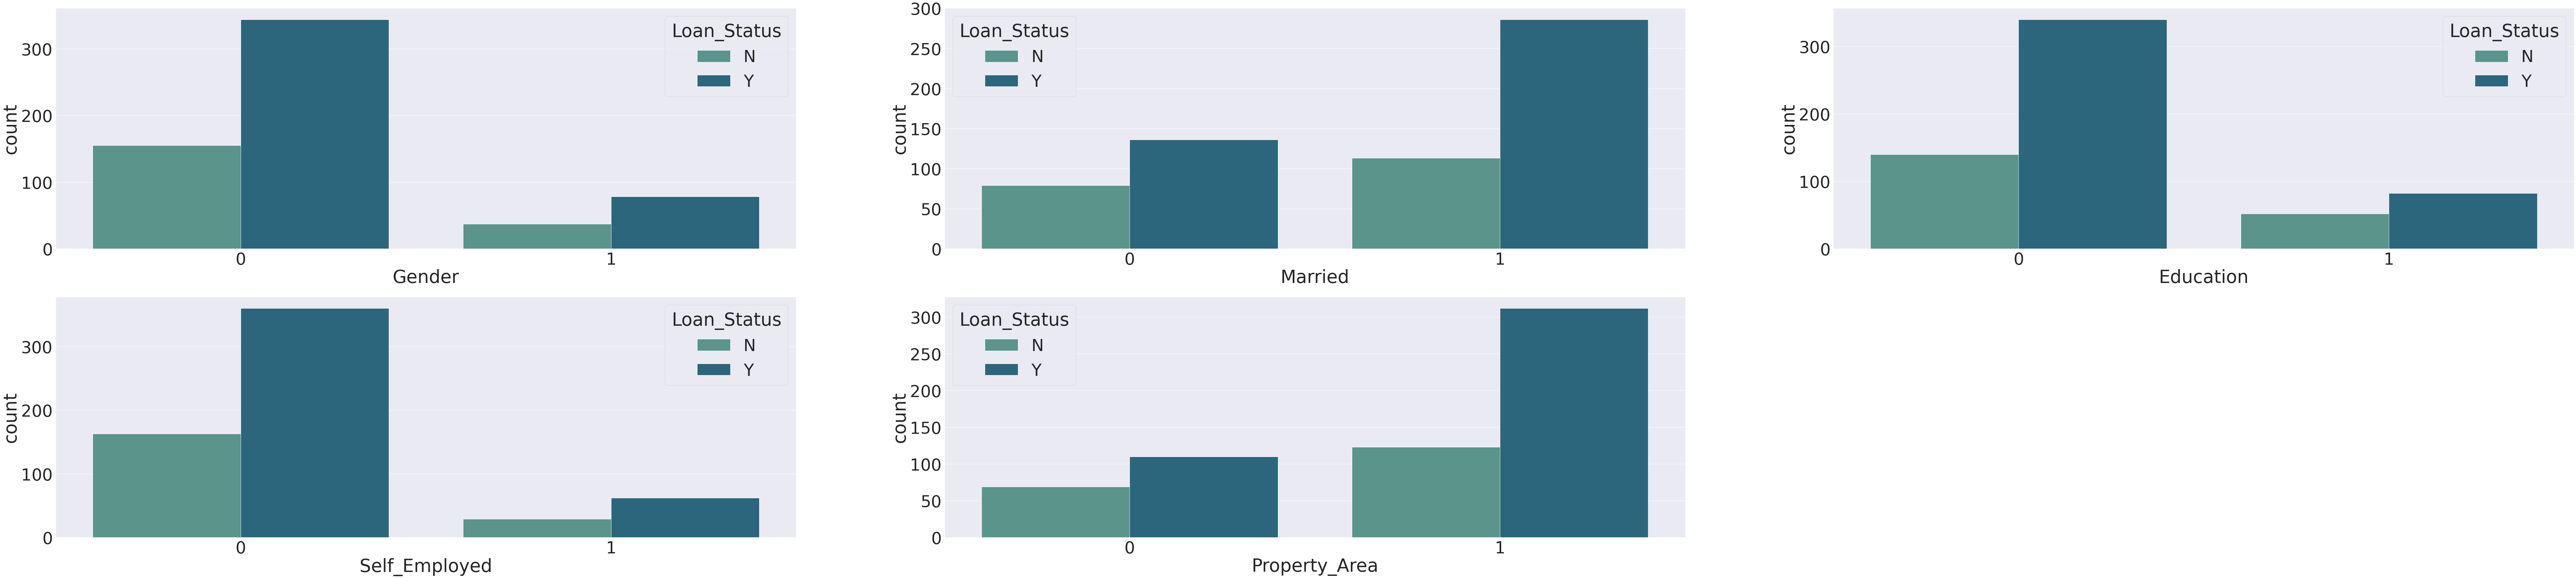

In [12]:
plt.figure(figsize = (150 , 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(df['Gender'] , hue = df['Loan_Status'] , palette = 'crest')
plt.subplot(332)
sns.countplot(df['Married'] , hue = df['Loan_Status'] , palette = 'crest')
plt.subplot(333)
sns.countplot(df['Education'] , hue = df['Loan_Status'] , palette = 'crest')
plt.subplot(334)
sns.countplot(df['Self_Employed'] , hue = df['Loan_Status'] , palette = 'crest')
plt.subplot(335)
sns.countplot(df['Property_Area'] , hue = df['Loan_Status'] , palette = 'crest')

In [13]:
X = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',]]

In [14]:
y = df['Loan_Status']

In [15]:
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,2378,0.0,9,360,1,1
1,0,1,2,0,0,1299,1086.0,17,120,1,1
2,0,0,0,1,0,3620,0.0,25,120,1,1
3,0,1,0,0,1,3459,0.0,25,120,1,1
4,0,1,1,0,0,5468,1032.0,26,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2,0,0,2947,1603.0,10,360,1,1
610,0,0,0,0,0,4680,2087.0,15,360,1,1
611,0,1,2,0,1,6633,0.0,25,360,0,0
612,0,1,1,1,0,2492,2375.0,30,360,1,0


In [16]:
y

0      N
1      Y
2      Y
3      Y
4      Y
      ..
609    N
610    N
611    N
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [17]:
X.shape

(614, 11)

In [18]:
y.shape

(614,)

In [19]:
X_std = X[['Applicant_Income', 'Coapplicant_Income',
       'Loan_Amount', 'Loan_Amount_Term']]
ss = StandardScaler()
X_std = ss.fit_transform(X_std)
X_std

array([[-0.49564665, -0.55448733, -1.52878429,  0.30300926],
       [-0.6724141 , -0.18306108, -1.4368431 , -3.14231829],
       [-0.29217568, -0.55448733, -1.34490192, -3.14231829],
       ...,
       [ 0.20142983, -0.55448733, -1.34490192,  0.30300926],
       [-0.47697057,  0.25779382, -1.28743867,  0.30300926],
       [-0.49204249,  0.74516252, -1.34490192, -2.2809864 ]])

In [20]:
ss = StandardScaler()

In [21]:
X_std = ss.fit_transform(X_std)

In [22]:
X_std

array([[-0.49564665, -0.55448733, -1.52878429,  0.30300926],
       [-0.6724141 , -0.18306108, -1.4368431 , -3.14231829],
       [-0.29217568, -0.55448733, -1.34490192, -3.14231829],
       ...,
       [ 0.20142983, -0.55448733, -1.34490192,  0.30300926],
       [-0.47697057,  0.25779382, -1.28743867,  0.30300926],
       [-0.49204249,  0.74516252, -1.34490192, -2.2809864 ]])

In [23]:
X = df[['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Applicant_Income', 'Coapplicant_Income',
        'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',]]
y = df['Loan_Status']
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state = 42 , stratify = y)
model = DecisionTreeClassifier( max_depth = 3 , random_state = 42)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
print(y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(model.score(X_test , y_test))

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'N' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'N' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y']
[[ 29  29]
 [  6 121]]
              precision    recall  f1-score   support

           N       0.83      0.50      0.62        58
           Y       0.81      0.95      0.87       127

    accuracy                           0.81       185
   macr

In [24]:
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,2378,0.0,9,360,1,1
1,0,1,2,0,0,1299,1086.0,17,120,1,1
2,0,0,0,1,0,3620,0.0,25,120,1,1
3,0,1,0,0,1,3459,0.0,25,120,1,1
4,0,1,1,0,0,5468,1032.0,26,360,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,1,2,0,0,2947,1603.0,10,360,1,1
610,0,0,0,0,0,4680,2087.0,15,360,1,1
611,0,1,2,0,1,6633,0.0,25,360,0,0
612,0,1,1,1,0,2492,2375.0,30,360,1,0


In [25]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state = 42 , stratify = y)

In [26]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((429, 11), (185, 11), (429,), (185,))

In [27]:
model = DecisionTreeClassifier( max_depth = 3 , random_state = 42)

In [28]:
model.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [29]:
y_pred = model.predict(X_test)

In [30]:
y_pred.shape

(185,)

In [31]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y

In [32]:
model.predict(X_test[10:20])

array(['Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y'], dtype=object)

In [33]:
y_test[10:20]

579    Y
160    N
327    N
356    N
513    N
185    Y
139    Y
274    N
316    Y
478    Y
Name: Loan_Status, dtype: object

In [34]:
model.predict_proba(X_test)

array([[0.16666667, 0.83333333],
       [0.30434783, 0.69565217],
       [0.16666667, 0.83333333],
       [0.30434783, 0.69565217],
       [0.16666667, 0.83333333],
       [0.30434783, 0.69565217],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.97222222, 0.02777778],
       [0.86363636, 0.13636364],
       [0.16666667, 0.83333333],
       [0.86363636, 0.13636364],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.86363636, 0.13636364],
       [0.30434783, 0.69565217],
       [0.30434783, 0.69565217],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.30434783, 0.69565217],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.16666667, 0.83333333],
       [0.97222222, 0.02777778],
       [0.16666667, 0.83333333],
       [0.86363636, 0.13636364],
       [0.

In [35]:
print(confusion_matrix(y_test,y_pred))

[[ 29  29]
 [  6 121]]


In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.83      0.50      0.62        58
           Y       0.81      0.95      0.87       127

    accuracy                           0.81       185
   macro avg       0.82      0.73      0.75       185
weighted avg       0.81      0.81      0.80       185



In [37]:
model.score(X_test , y_test)

0.8108108108108109

[Text(0.4444444444444444, 0.875, 'X[9] <= 0.5\ngini = 0.43\nsamples = 429\nvalue = [134, 295]'),
 Text(0.2222222222222222, 0.625, 'X[8] <= 66.0\ngini = 0.155\nsamples = 59\nvalue = [54, 5]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.375, 'X[6] <= 1772.0\ngini = 0.128\nsamples = 58\nvalue = [54, 4]'),
 Text(0.2222222222222222, 0.125, 'gini = 0.054\nsamples = 36\nvalue = [35, 1]'),
 Text(0.4444444444444444, 0.125, 'gini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(0.6666666666666666, 0.625, 'X[7] <= 16.0\ngini = 0.339\nsamples = 370\nvalue = [80, 290]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.375, 'X[10] <= 0.5\ngini = 0.332\nsamples = 367\nvalue = [77, 290]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.423\nsamples = 115\nvalue = [35, 80]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.278\nsamples = 252\nvalue = [42, 210]')]

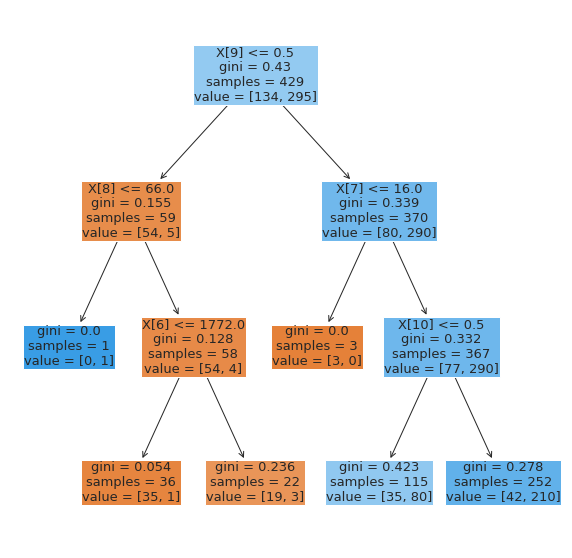

In [38]:
plt.figure(figsize = (10 , 10))
plot_tree(model , filled = True)